In [15]:
from xai.policy import *
import mnist
import matplotlib.pyplot as plt

import torch
import random
import numpy as np

In [16]:
images = torch.from_numpy(mnist.train_images())
images = images.float()/255.0

labels = torch.from_numpy(mnist.train_labels())
labels_one_hot = torch.zeros((labels.shape[0],10)).float()
labels_one_hot[torch.arange(0,labels.shape[0]),labels.int()] = 1.0

images.shape, labels_one_hot.shape

(torch.Size([60000, 28, 28]), torch.Size([60000, 10]))

In [17]:
encoder = Policy.new((28,28),5)
decoder = Policy.new(5,(28,28))
autoencoder = encoder + decoder
autoencoder

Sequential(
  (0): Linear(in_features=784, out_features=524, bias=True)
  (1): ReLU()
  (2): Linear(in_features=524, out_features=264, bias=True)
  (3): ReLU()
  (4): Linear(in_features=264, out_features=5, bias=True)
  (5): Linear(in_features=5, out_features=264, bias=True)
  (6): ReLU()
  (7): Linear(in_features=264, out_features=524, bias=True)
  (8): ReLU()
  (9): Linear(in_features=524, out_features=784, bias=True)
)

In [18]:
autoencoder.adam().fit(
    X=images,
    Y=images,
    steps=10000,
    batch_size=64,
    loss_criterion="MSELoss",
    verbose=True
)

Loss: 0.020846: 100%|██████████| 10000/10000 [02:50<00:00, 58.82it/s]


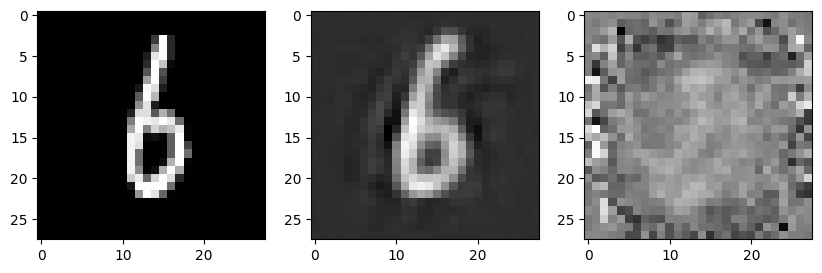

In [22]:
X = images[random.randint(0,len(images))]
feedforward = autoencoder(X)

Y = feedforward.numpy()

dY = feedforward.derivative(lambda t: t.sum(), order=1)

fig = plt.figure(figsize=(10,7)) 
fig.add_subplot(1,3,1)
plt.imshow(X, cmap="gray") 
fig.add_subplot(1,3,2)
plt.imshow(Y, cmap="gray") 
fig.add_subplot(1,3,3)
plt.imshow(dY, cmap="gray")